# **Ethereum Transactions Analysis - One Week Data**  

In this assignment, the objective is to analyze Ethereum transaction data over one week. Several methods were explored to gather this data:  

### 1. APIs  
- **Ethereum Data APIs**: While sites like Basescan, Polygonscan, and Arbiscan offer API services, no suitable option was found for extracting complete transaction data across a week.  
- **Closest Option Found**: The APIs provide access to certain transactions (e.g., *internal transactions by address* or *transaction hash*), but this does not cover all transactions needed.  
- **Rate Limits**: API rate limits also posed a constraint, as the volume of queries needed to cover an entire week’s transactions would exceed the available request quotas or become time-prohibitive.  

### 2. Web Scraping  
- **Basics with BeautifulSoup**: Scraping was explored using BeautifulSoup. However, most websites explicitly prohibit scraping and employ complex measures to prevent it, requiring advanced methods like browser automation with Selenium.  
- **Limitations on Basescan**: Basescan, for example, only displays recent transactions (up to the last 2 hours), around 500K transactions out of approximately 6 million daily. Other websites like Arbiscan are slightly better (up to the last 7 hours) but still fall short of a complete daily record.  

Due to these limitations, Arbitrum was considered as a data source due to its smaller daily transaction volume.  

### Scraping Process: Block-by-Block Data Extraction  

Block-by-Block Navigation: Since the transaction data needed is organized by block, a plan was developed to retrieve transactions within each block for the week of interest.  

Workflow:  
- Step 1: Start from the most recent block and iterate backward.  
- Step 2: Access the individual block’s page to extract transaction details.  
- Step 3: Check the timestamp of each transaction in the block.  
- Step 4: If the timestamp falls within the specified date range, the transaction data is saved.  
- Step 5: Continue moving back through the blocks until transactions outside of the target week are reached.  

### 3. Blockchair Dataset    
- Blockchair provides downloadable Ethereum transaction data in TSV format, with daily datasets going back to 2015.  
- **Data Availability**: Blockchair provides Ethereum transaction data files in TSV format, organized by date, with historical data going back to 2015. Each file contains all transactions for a given day, making it possible to download daily transaction datasets directly.  
- **Ease of Download**: The data can be downloaded from [Blockchair’s Ethereum Data Archives](https://gz.blockchair.com/ethereum/transactions/). The TSV files are available for every day from 2015 onward, enabling direct access without needing to scrape or query APIs.  
- **Data Size Considerations**:  
  - **Recent Datasets**: More recent daily files are around 1GB each, containing millions of transactions, which could be challenging to handle due to file size and memory requirements.  
  - **Selected Date Range**: To keep the data manageable while still offering a meaningful scope, a one-week period from **November 8, 2017, to November 14, 2017**, was selected. This period includes more than 3 million transactions.  

---  

## Data Preparation and Analysis  

With the data downloaded, each day’s TSV file was imported into the notebook and combined into a single DataFrame.  

---

# **Data loading**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading one week of tsv files transactions
df1 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171108.tsv', sep='\t')
df2 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171109.tsv', sep='\t')
df3 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171110.tsv', sep='\t')
df4 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171111.tsv', sep='\t')
df5 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171112.tsv', sep='\t')
df6 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171113.tsv', sep='\t')
df7 = pd.read_csv('/content/drive/MyDrive/NLP/week/blockchair_ethereum_transactions_20171114.tsv', sep='\t')

In [ ]:
# Concatinating them all into one dataframe
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201398 entries, 0 to 3201397
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   block_id            int64  
 1   index               object 
 2   hash                object 
 3   time                object 
 4   failed              int64  
 5   type                object 
 6   sender              object 
 7   recipient           object 
 8   call_count          int64  
 9   value               object 
 10  value_usd           float64
 11  internal_value      object 
 12  internal_value_usd  float64
 13  fee                 float64
 14  fee_usd             float64
 15  gas_used            int64  
 16  gas_limit           int64  
 17  gas_price           int64  
 18  input_hex           object 
 19  nonce               int64  
 20  v                   object 
 21  r                   object 
 22  s                   object 
dtypes: float64(4), int64(7), object(12)
memory usage: 561.8+ 

# **Data preprocessing**

In [ ]:
# Dropping duplicated rows
df.drop_duplicates(inplace=True)

# Dropping useless columns
useful_columns = ['block_id', 'time', 'value', 'value_usd', 'fee_usd', 'gas_used','hash']
week_df = df[useful_columns]
week_df['time'] = pd.to_datetime(week_df['time'])
week_df['value'] = week_df['value'].astype(float)

<ipython-input-4-710e97b33d52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_df['time'] = pd.to_datetime(week_df['time'])
<ipython-input-4-710e97b33d52>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_df['value'] = week_df['value'].astype(float)


In [ ]:
# Checking for null values
display(week_df.isna().sum())
display(week_df.info())
week_df.describe()

,0
block_id,0
time,0
value,0
value_usd,0
fee_usd,0
gas_used,0
hash,0


<class 'pandas.core.frame.DataFrame'>
Index: 3201370 entries, 0 to 3201397
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   block_id   int64         
 1   time       datetime64[ns]
 2   value      float64       
 3   value_usd  float64       
 4   fee_usd    float64       
 5   gas_used   int64         
 6   hash       object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 195.4+ MB


None

,block_id,time,value,value_usd,fee_usd,gas_used
count,3.201370e+06,3201370,3.201370e+06,3.201370e+06,3.201370e+06,3.201370e+06
mean,4.532109e+06,2017-11-11 11:28:55.178782208,2.978530e+19,9.129377e+03,2.075165e-01,5.255422e+04
min,4.510404e+06,2017-11-08 00:00:01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.520730e+06,2017-11-09 15:51:30,0.000000e+00,0.000000e+00,4.980000e-02,2.100000e+04
50%,4.531938e+06,2017-11-11 10:52:31,3.148557e+16,9.636650e+00,1.282000e-01,2.113600e+04
75%,4.543390e+06,2017-11-13 06:43:08,9.517888e+17,2.898404e+02,1.716000e-01,5.005700e+04
max,4.553993e+06,2017-11-14 23:59:47,2.472367e+23,7.762985e+07,5.576509e+03,6.715576e+06
std,1.280807e+04,NaN,2.998508e+20,9.149189e+04,6.189747e+00,1.502547e+05


# **Analyzing Daily Ethereum Transactions and Average Fees**

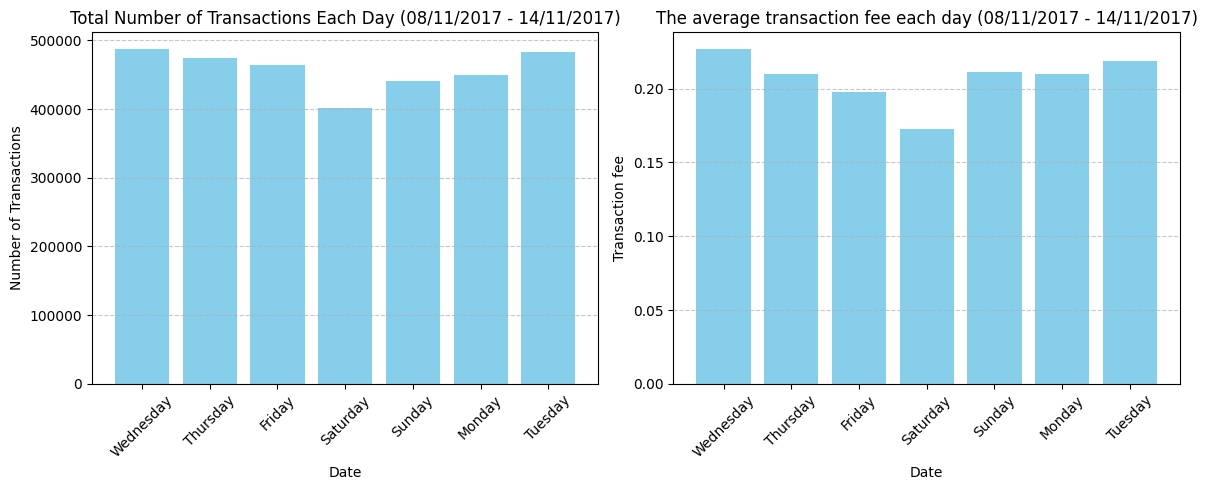

In [ ]:
day_names = ['Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday','Monday', 'Tuesday']

daily_transactions = df.groupby(week_df['time'].dt.date)['hash'].count()
hourly_transactions = df.groupby(week_df['time'].dt.hour)['hash'].count()
daily_fee = df.groupby(week_df['time'].dt.date)['fee_usd'].mean()
hourly_fee = df.groupby(week_df['time'].dt.hour)['fee_usd'].mean()


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting blocks created each day
ax[0].bar(day_names, daily_transactions, color='skyblue')
ax[0].set_title('Total Number of Transactions Each Day (08/11/2017 - 14/11/2017)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Transactions')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting blocks created each day
ax[1].bar(day_names, daily_fee, color='skyblue')
ax[1].set_title('The average transaction fee each day (08/11/2017 - 14/11/2017)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Transaction fee')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()

# **Hourly Analysis of Ethereum Transactions and Average Fees**

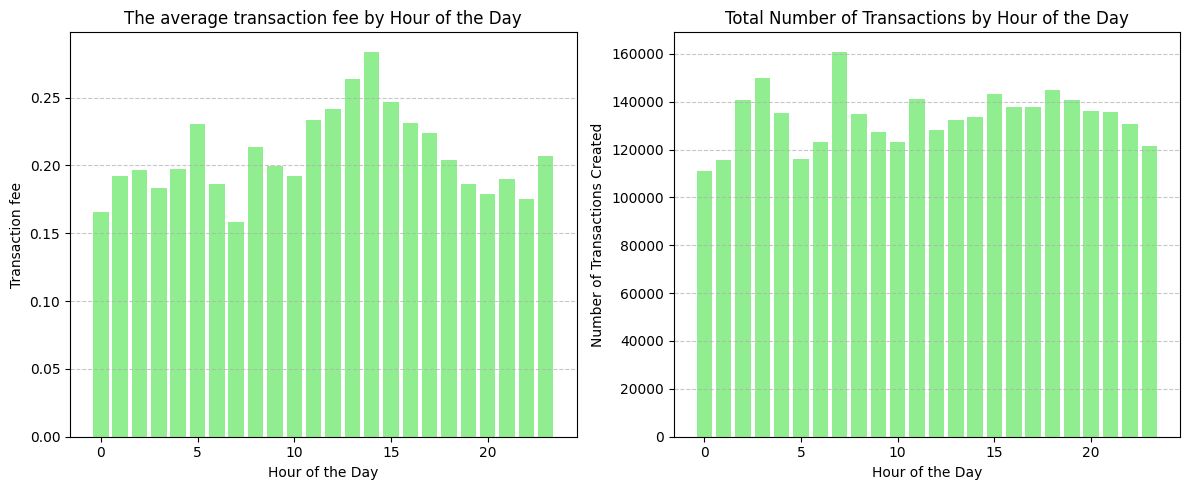

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting blocks created by hour
ax[0].bar(hourly_transactions.index, hourly_fee, color='lightgreen')
ax[0].set_title('The average transaction fee by Hour of the Day')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Transaction fee')
ax[0].tick_params(axis='x', rotation=0)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)


# Plotting blocks created by hour
ax[1].bar(hourly_transactions.index, hourly_transactions, color='lightgreen')
ax[1].set_title('Total Number of Transactions by Hour of the Day')
ax[1].set_xlabel('Hour of the Day')
ax[1].set_ylabel('Number of Transactions Created')
ax[1].tick_params(axis='x', rotation=0)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As shown in the graphs, we observe a positive correlation between transaction volume and transaction fees. This indicates that as the number of transactions on the Ethereum network increases, the average fee tends to rise.

# **Calculating the Total Number of Unique Blocks**

In [ ]:
# Total number of unique blocks
total_blocks = week_df['block_id'].nunique()
print(f"Total number of blocks created: {total_blocks}")

Total number of blocks created: 43590


# **Number of Blocks Created by Day and Hour**

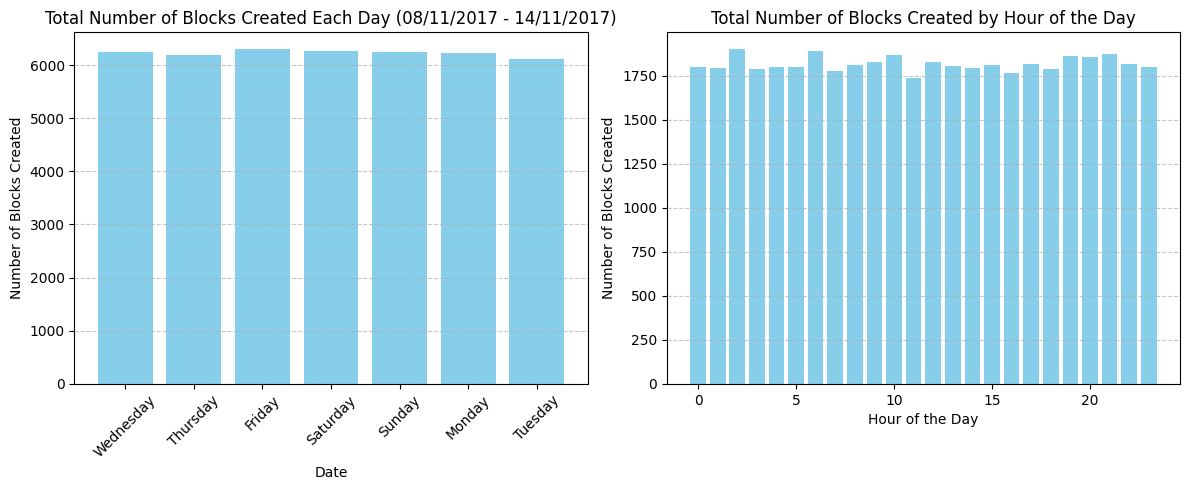

In [ ]:
# Group by day
blocks_per_day = week_df.groupby(week_df['time'].dt.date)['block_id'].nunique()

# Group by hour
blocks_per_hour = week_df.groupby(week_df['time'].dt.hour)['block_id'].nunique()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting blocks created each day
ax[0].bar(day_names, blocks_per_day, color='skyblue')
ax[0].set_title('Total Number of Blocks Created Each Day (08/11/2017 - 14/11/2017)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Blocks Created')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting blocks created by hour
ax[1].bar(blocks_per_hour.index, blocks_per_hour, color='skyblue')
ax[1].set_title('Total Number of Blocks Created by Hour of the Day')
ax[1].set_xlabel('Hour of the Day')
ax[1].set_ylabel('Number of Blocks Created')
ax[1].tick_params(axis='x', rotation=0)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The data indicates that blocks are created at a steady rate throughout each day and across the week, with an average of approximately 6,000 blocks generated daily

# **Number of Transactions per Block**

In [ ]:
# Number of transactions per block
transactions_per_block = week_df.groupby('block_id')['hash'].count().reset_index(name='num_transactions')
transactions_per_block.describe()

,block_id,num_transactions
count,4.359000e+04,43590.000000
mean,4.532198e+06,73.442762
std,1.258349e+04,58.470730
min,4.510404e+06,1.000000
25%,4.521301e+06,27.000000
50%,4.532198e+06,60.000000
75%,4.543096e+06,110.000000
max,4.553993e+06,321.000000


With a median of 60 transactions and an average (mean) of 73. This disparity between median and mean suggests occasional blocks with significantly higher transaction counts,


# **Mean Transaction Fees per Block in USD**

In [ ]:
# mean fees per block in USD
fees_per_block = week_df.groupby('block_id')['fee_usd'].mean().reset_index(name='mean_fee_usd')
fees_per_block.describe()

,block_id,mean_fee_usd
count,4.359000e+04,43590.000000
mean,4.532198e+06,0.232470
std,1.258349e+04,1.026673
min,4.510404e+06,0.000000
25%,4.521301e+06,0.113745
50%,4.532198e+06,0.158970
75%,4.543096e+06,0.211070
max,4.553993e+06,96.230132


The data shows that the transaction fee per block remains relatively stable across different blocks


# **Summary Statistics for Transaction Values in USD**

In [ ]:
# Summary statistics for transaction values in USD
week_df['value_usd'].describe()

,value_usd
count,3.201370e+06
mean,9.129377e+03
std,9.149189e+04
min,0.000000e+00
25%,0.000000e+00
50%,9.636650e+00
75%,2.898404e+02
max,7.762985e+07


There is a significant difference between the mean and median transaction values, with a mean of 9,000 and a median of 9.63. This large gap suggests that the dataset includes a number of high-value transactions, skewing the average upwards while the median remains much lower, indicating that most transactions are of relatively low value."

# **Ethereum Price Trend Analysis Over the Week**

<ipython-input-18-29b2420bcd21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_df['eth_price'] = week_df['value_usd'] / week_df['value']
<ipython-input-18-29b2420bcd21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_df['date'] = week_df['time'].dt.date  # Extract date


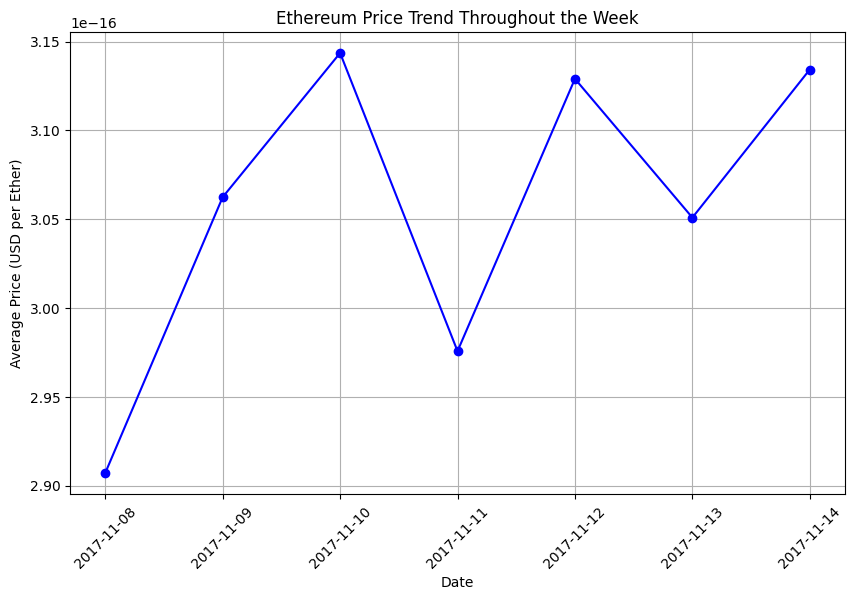

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the Ether price (USD per Ether) for each transaction
week_df['eth_price'] = week_df['value_usd'] / week_df['value']

# Calculate the daily average Ethereum price
week_df['date'] = week_df['time'].dt.date  # Extract date
daily_eth_price = week_df.groupby('date')['eth_price'].mean()

# Plotting the daily Ethereum price trend
plt.figure(figsize=(10, 6))
daily_eth_price.plot(kind='line', marker='o', color='b')
plt.title('Ethereum Price Trend Throughout the Week')
plt.xlabel('Date')
plt.ylabel('Average Price (USD per Ether)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The analysis of Ethereum price trends throughout the week reveals slight fluctuations; however, the overall trajectory shows a rising trend.